# TP3 

### 1)

In [1]:
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV



In [2]:
scoresTP=dict()

In [3]:

df= pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", ",", header=None)
df.head(5)



,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


Il y a 211 colonnes dans le dataset dont une de label, ce qui fait 210 variables explicatives avec 442 observations.

In [4]:
print(df.shape)

(442, 211)


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


In [6]:
meandf=pd.DataFrame(np.abs(df.mean()))
meandfnonzero=meandf.loc[meandf[0]>10**-10]
print(meandfnonzero)

              0
210  152.133484


In [7]:
stddf=pd.DataFrame(df.std())
stddfnon1=stddf.loc[np.abs(stddf[0]-1)>10**-2]
print(stddfnon1)

             0
210  77.093005


Les variables explicatives sont centrées et normalisées. La variable y à expliquer ne l'est pas, ni normalisée ni centrée.

In [8]:
Xdf = df.drop([210], 1)
ydf = df[210]

In [9]:
randomX= df.sample(4, axis=1)
randomX["y"]=ydf


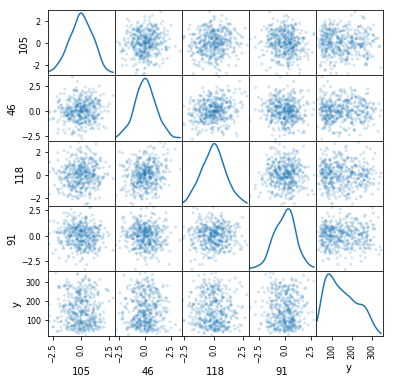

In [10]:
scatter_matrix(randomX, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

Les variables semblent avoir une distribution normale. Ce graph ne nous permet pas de voir une corrélation entre les variables.

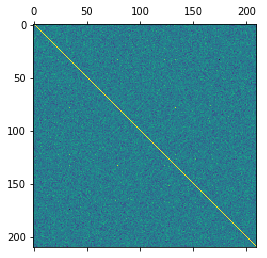

In [11]:
plt.matshow(Xdf.corr())
plt.show()

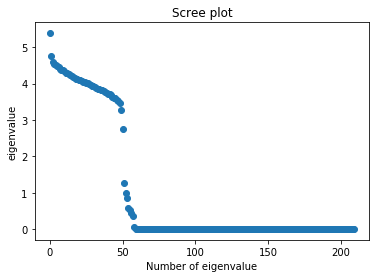

In [12]:
coveigenvalues, coveigenvectors= np.linalg.eigh(Xdf.cov())
eig_vals_sorted = np.sort(coveigenvalues)[::-1]
plt.scatter(np.arange(len(eig_vals_sorted)),eig_vals_sorted)
plt.xlabel("Number of eigenvalue")
plt.ylabel("eigenvalue")
plt.title("Scree plot")
plt.show()

Apres les 60 premières valeurs propres on a des valeurs propres négligeables, presque égale à 0.
Cela veut dire l'on peut exprimer très précisement les dernières composantes avec les 60 premières, principales.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(np.array(Xdf), np.array(ydf), test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 210)
(89, 210)
(353,)
(89,)


Ci dessus les dimensions de nos matrices de train et de test (X puis y)

In [14]:
U, S, V = np.linalg.svd(X_train) 
#Je reconstruis les valeurs propres de la matrice de de gram grâce aux valeurs singulières
eigvals = S**2 / np.cumsum(S)[-1]

Ici nul besoin d'ordonner les valeurs propres car les valeurs singulières (S) le sont déjà 

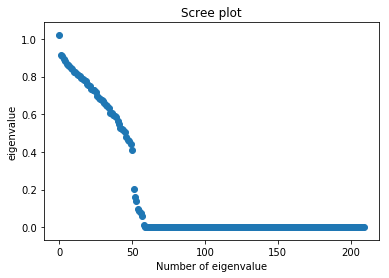

In [15]:

plt.figure()
plt.scatter(np.arange(len(eigvals)),eigvals)
plt.xlabel("Number of eigenvalue")
plt.ylabel("eigenvalue")
plt.title("Scree plot")
plt.show()


<div>Vérification<div>
On retrouve bien la même valeur 60 à partir de laquelle les valeurs propres sont négligeables

## 5) PCA before OLS
    Ici je vais utiliser la svd pour faire la PCA. 
    La PCA sert à réduire les dimensions de X (train) pour enlever l'information redondante et ne pas  travailler avec des matrices énormes et non inversibles (XtX^-1)

In [16]:
#Je prends d'abord les matrices complètes que je vais réduire moi même
U_train, S_train, V_train = np.linalg.svd(X_train)
eigvals = S_train**2 / np.cumsum(S_train)[-1]


Comme vu dans la question 3, on peut ne garder que les 60 premiers vecteurs et valeurs propres

In [17]:
#on réduit U S V
Ureduced = U_train[:,:60]
Sreduced = np.diag(S_train)[:60,:60]
Vreduced = V_train.T[:,:60]
Xreduced=Ureduced@Sreduced
#On projette XTrain sur le nouvel espace formé par les PCs de la PCA
Xpca = X_train@Vreduced
print(Xpca.shape)
print(np.sum(Xreduced-Xpca))

(353, 60)
5.3555580854943406e-14


J'ai réduit mon X_train qui comportait 210 colonnes à 60 colonnes. Ici on vérifie que XV=US

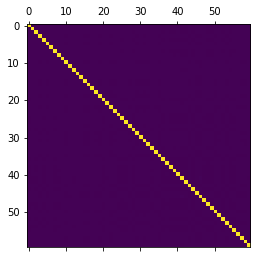

In [18]:
plt.matshow(pd.DataFrame(Xpca).corr())
plt.show()

Ici on vérifie que la matrice de corrélation n'indique plus de corrélation. En effet on a enlevé l'information redondante.

#### Maintenant on peut réaliser la regression linéaire avec notre nouvelle matrice Xpca issue de la PCA

In [19]:
#Ajout de l'intercept à Xpca
Xpca_I = sm.add_constant(Xpca)
gramPca=Xpca_I.T@Xpca_I
# Pour calculer Theta, on peut utiliser inv car il n'y a plus de corrélation maintenant
thetapca=np.linalg.inv(gramPca)@Xpca_I.T@y_train
#On projette Xtest sur l'espace PCA 
XtestPca= X_test@Vreduced
XtestPca= sm.add_constant(XtestPca)
ypredpca= XtestPca@thetapca

On calcule le coefficient de détermination

In [20]:
R2pca=1-np.sum((ypredpca-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["PCA+OLS"]=R2pca
print(R2pca)

0.4228732799051903


On peut vérifier avec scikit learn le R2

In [21]:
# Choix de sklearn
regpca = LinearRegression()
regrpca = regpca.fit(Xpca_I, y_train)
print(regpca.score(XtestPca,y_test))

0.4228732799051902


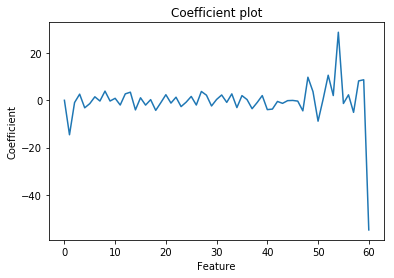

In [22]:

plt.figure()
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient plot")
plt.plot(regrpca.coef_)
plt.show()

On fait l'OLS maintenant sur X_train (sans pca) pour comparer

In [23]:
X_train_I = sm.add_constant(X_train)
X_test_I = sm.add_constant(X_test)

In [24]:
rangXtrain=np.linalg.matrix_rank(X_train)
print(rangXtrain)

60


La matrice n'est donc pas de rang plein, ie on ne peut pas l'inverser, car comme le montre la matrice de corrélation elle contient de l'information redondante

X_train non inversible on prend la pseudoinverse

Je vais utiliser ici deux méthodes pour m'assurer du résultat. La 1ere avec la fonction pinv de numpy, la deuxième avec la svd en reconstruisant la pseudoinverse comme vu dans le cours.  

In [25]:
thetaLR=np.linalg.pinv(X_train_I)@y_train
ypredLR= X_test_I@thetaLR
Rlr=1-np.sum((ypredLR-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["OLS"]=Rlr
print(Rlr)

0.42287327990518964


Je fais la même chose mais avec la SVD.
Je refais une svd de X_train avec intercept pour exprimer la pseudoinverse
Je pouvais également réutiliser celle de PCA 

In [26]:
U_SVD, S_SVD, VT_SVD = np.linalg.svd(X_train_I, full_matrices=False) 

Pour perdre le moins d'informations possible je garde les valeurs propres > 0.0001

In [27]:
S_SVDR=S_SVD[np.where( S_SVD > 0.0001 )] 
#je reduis ensuite u et v
U_SVDR=U_SVD[:,:S_SVDR.size]
VT_SVDR=VT_SVD[:S_SVDR.size,:]
#je calcule theta et la prediction sur X_test
thetaLRSVD=VT_SVDR.T@np.linalg.inv(np.diag(S_SVDR))@U_SVDR.T@y_train
ypredLRSVD= X_test_I@thetaLRSVD
RlrSVD=1-np.sum((ypredLRSVD-y_test)**2)/np.sum((y_test-y_test.mean())**2)
print(RlrSVD)

0.4228732799051894


On a bien le même score pour OLS sans pca ( avec la svd ou directement la fonction pseudoinverse de np)

On trace également les coefficients obtenus

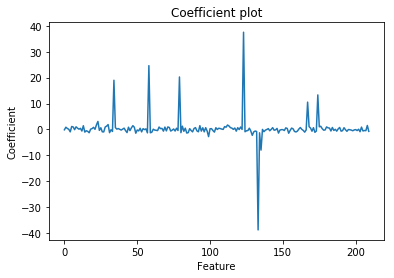

In [28]:
plt.figure()
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Coefficient plot")
plt.plot(thetaLR[1:])
plt.show()

## 6) Intercepts

On affiche les intercepts des coefficients obtenus par OLS et PCA + OLS

In [29]:
print(thetapca[0])
print(thetaLR[0])
print(y_train.mean())

151.98722037863627
151.9872203786363
153.05382436260624


On en conclut que les coefficient des OLS et PCA OLS sont sensiblement les mêmes et presque égaux à la moyenne de y_train. Cela est du au fait que les variables de X_train ne sont plus centrées ni normalisées car on a pris un échantillon de X. D'où le petit écart.

On standardise Xpca (centrage+ normalisation)

In [30]:
scaler = StandardScaler()
std = scaler.fit(Xpca)
XpcaStd = scaler.transform(Xpca)
thetapcaStd=np.linalg.inv(XpcaStd.T@XpcaStd)@XpcaStd.T@y_train
regpcaStd = LinearRegression()
regrpcaStd = regpcaStd.fit(XpcaStd, y_train)
print(regrpcaStd.intercept_)
print(y_train.mean())

153.05382436260624
153.05382436260624


Ici on vérifie bien que l'intercept est égal à la moyenne de y.

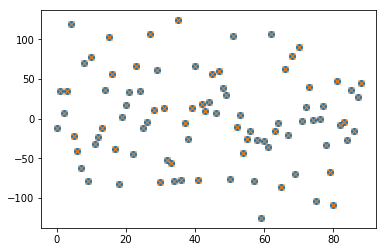

In [32]:
plt.figure()
plt.plot(y_test-ypredpca, "o")
plt.plot(y_test-ypredLR, "x")
plt.show()

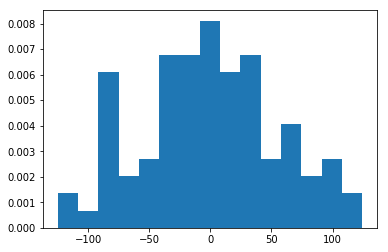

In [33]:
plt.figure()
plt.hist(y_test-ypredpca, bins=15, density=True)

plt.show()

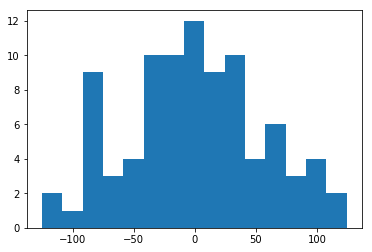

In [34]:
plt.figure()
plt.hist(y_test-ypredLR, bins=15)

plt.show()

In [35]:
#x_train.describe()

In [36]:
print("R2 score avec OLS "+str(Rlr))
print("R2 score avec PCA +OLS "+str(R2pca))

R2 score avec OLS 0.42287327990518964
R2 score avec PCA +OLS 0.4228732799051903


Les coefficients de détermination respectivement de l'ols et PCA+OLS ci dessus sont à peu près les mêmes

In [37]:
#from sklearn.preprocessing import StandardScaler
#print(X_train.shape)

#X_trainfwd= np.append(np.ones((X_train.shape[0],1)), X_train, axis=1)
#columns= np.append("intercept",range(0,210))
#print(columns)
#df_X_train=pd.DataFrame(X_trainfwd, columns=columns)

#X_testfwd= np.append(np.ones((X_test.shape[0],1)), X_test, axis=1)
#columns= np.append("intercept",range(0,210))
#print(columns)
#df_X_test=pd.DataFrame(X_testfwd, columns=columns)
#std_scaler = StandardScaler().fit(X_train)
#X_trainfwd = std_scaler.transform(X_train)
#x_trainfwd=pd.DataFrame(X_trainfwd)
#x_trainfwd.describe()






## 8) Forward selection

On définit la fonction de forward selection avec un seuil en paramètre pour répondre à la question 9

In [200]:

def forward_selection3(Xfwd, threshold=1):

    p=Xfwd.shape[1]
    n=Xfwd.shape[0]
    r= y_train
    test = np.zeros((p,p))
    pval_mem = np.zeros(p)
    pval = np.zeros((p,p))
    resids = y_train
    var_sel = []
    var_remain = list(range(p))
    in_test = []
    regr = LinearRegression(fit_intercept = False)
    
    for k in range(p): 
        resids_mem = np.zeros((p,n))
        for i in var_remain:
            xtmp = Xfwd [:,[i]]
            regr.fit(xtmp , resids)

            xx = np.sum( Xfwd [:,[i]] ** 2 )    
            resids_mem [i,:] = regr.predict(xtmp) - resids
            sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / xx
            test[k,i] = np.sqrt(n) * np.abs(regr.coef_) / (np.sqrt( sigma2_tmp )) 
            pval[k,i] =   2 * (1 - norm.cdf(test[k,i]))

        best_var = np.argmax(test[k,:])
        var_sel.append(best_var)
        resids = resids_mem[best_var,:]
        if pval[k,best_var] > threshold:
            break
        pval_mem [k] = pval[k,best_var]
        var_remain = np.setdiff1d(var_remain,var_sel)
        
    return var_sel, test, pval_mem

In [201]:

def forward_selection(Xfwd, threshold=1):

    p=Xfwd.shape[1]
    n=Xfwd.shape[0]
    r= y_train
    test = np.zeros((p,p))
    pval_mem = np.zeros(p)
    pval = np.zeros((p,p))
    resids = y_train
    var_sel = []
    var_remain = list(range(p))
    in_test = []
    regr = LinearRegression(fit_intercept = False)
    
    for k in range(p): 
        resids_mem = np.zeros((p,n))
        #pour chaque variable explicative on fait une OLS en ajoutant l'intercept
        for i in var_remain:
            Xtemp=np.append(np.ones((Xfwd.shape[0],1)),Xfwd [:,[i]], axis=1)
            gramtemp=Xtemp.T@Xtemp
            thetatemp=np.linalg.pinv(gramtemp)@Xtemp.T@resids
            ypredtemp=Xtemp@thetatemp
            resids_mem [i,:] = ypredtemp-resids
            sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / gramtemp[1,1]
            test[k,i] = np.sqrt(n) * np.abs(thetatemp[1]) / (np.sqrt( sigma2_tmp )) 
            pval[k,i] =   2 * (1 - norm.cdf(test[k,i]))

        ####separe en deux vecteurs la listes des variables séléctionnées et les autres
        best_var = np.argmax(test[k,:])
        var_sel.append(best_var)
        resids = resids_mem[best_var,:]
        if pval[k,best_var] > threshold:
            break
        pval_mem [k] = pval[k,best_var]
        var_remain = np.setdiff1d(var_remain,var_sel)
        
    return var_sel, test, pval_mem

On run la fonction ci dessus et on affiche les résultats dans un dataframe

In [212]:
#Definition des dataframe avec les colonnes correspondantes pour X_train et X_test
X_trainfwd= np.append(np.ones((X_train.shape[0],1)), X_train, axis=1)
columns= np.append("intercept",range(0,210))
df_X_train=pd.DataFrame(X_trainfwd, columns=columns)

X_testfwd= np.append(np.ones((X_test.shape[0],1)), X_test, axis=1)
columns= np.append("intercept",range(0,210))
df_X_test=pd.DataFrame(X_testfwd, columns=columns)

v,t,p= forward_selection(X_trainfwd)
featureSelected= df_X_train.columns[v]
display(pd.DataFrame(featureSelected))

,0
0,intercept
1,58
2,123
3,129
4,13
5,31
6,133
7,29
8,59
9,35


## 9) Forward selection avec un seuil de 0.1 sur la pvalue

Cette fois on run la fonction avec le paramètre de seuil 0.1

In [204]:
varfwd_selected,stats,pvalues = forward_selection(X_trainfwd, 0.1)
indexOfVarSelected= df_X_train.columns[varfwd_selected]

On plot les 3 premières itérations pour les variables sélectionnées

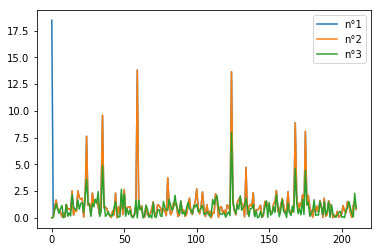

In [205]:
plt.plot(stats[0], label="n°1")
plt.plot(stats[1],label="n°2")
plt.plot(stats[2],label="n°3")
plt.legend()
plt.show()

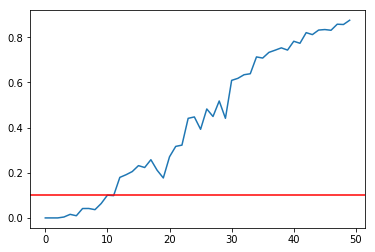

In [206]:
plt.plot(p[0:50], label="n°1")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.show()

In [207]:
pd.DataFrame(indexOfVarSelected).head(20)

,0
0,intercept
1,58
2,123
3,129
4,13
5,31
6,133
7,29
8,59
9,35


## 10) OLS sur les variables sélectionnées par forward selection

In [208]:
#On construit notre nouvel X avec les colonnes sélectionnées
Xfwd=df_X_train[ indexOfVarSelected]
pdXfwd= pd.DataFrame(Xfwd)
pdXfwd.head()

,intercept,58,123,129,13,31,133,29,59,35,81
0,1.0,1.501026,1.501604,1.157678,1.532819,-0.874904,1.847318,0.024333,0.386046,2.244954,-0.549792
1,1.0,0.866554,0.707594,0.718098,1.224465,1.120734,-0.669396,-1.539673,0.380395,0.155604,-2.814923
2,1.0,-0.447709,1.663425,0.716352,0.554566,-1.791767,0.950558,0.879688,-0.339494,0.179690,0.666031
3,1.0,-1.376756,-0.069457,-0.766707,-0.990702,0.133378,-0.148697,-0.515301,-0.215077,-1.180763,1.472772
4,1.0,1.795602,1.701832,0.397604,-0.359056,-0.632968,1.934102,-0.747496,-0.588480,-0.249245,-2.498932


In [209]:
# Pareil pour Xtest
Xtestfwd=df_X_test[indexOfVarSelected]
Xtestfwd.head()

,intercept,58,123,129,13,31,133,29,59,35,81
0,1.0,0.390700,-1.215177,1.832893,0.030336,-2.848904,0.082726,-1.046563,0.218118,3.276513,-1.867031
1,1.0,-0.946222,-0.646507,1.465882,0.235979,1.558289,0.227364,-0.056701,-0.810502,-0.246907,0.361369
2,1.0,2.588691,0.770434,2.795967,0.314921,-0.541631,-2.202567,0.481621,-0.444215,1.386479,-0.914531
3,1.0,0.866554,-0.229253,-2.419339,0.388564,0.084054,0.863775,0.121591,-0.524752,-0.909410,0.498026
4,1.0,-0.810264,-0.473291,-1.190278,-1.810163,-1.016719,1.615896,0.617683,0.196670,-0.317617,-1.225810


On fait notre prédiction sur ces nouveaux X_train et X_test

In [211]:
gram= Xfwd.T@Xfwd
B= np.linalg.inv(gram).dot(Xfwd.transpose().dot(y_train))
ypredFwd= Xtestfwd@B
prediction_error= np.sum((y_test-ypredFwd)**2)
R2fwd= 1-prediction_error/(np.sum((y_test-y_test.mean())**2))
print("R2 forward selection="+str(R2fwd))
print("predictionError="+str(prediction_error))

R2 forward selection=0.33496638604425166
predictionError=317586.95179032354


Vérification avec les packages

In [47]:
regSelected= LinearRegression()
regSelected.fit(Xfwd, y_train)

pd.DataFrame(Xtestfwd).head()
scoreSelected= regSelected.score(Xtestfwd, y_test)
scoresTP["Fwd"]=scoreSelected
print("R2 avec forward selection= "+str(scoreSelected))


R2 avec forward selection= 0.3348982842131624


## 11) Validation croisée Kfold

In [48]:
kf = KFold(n_splits=4, shuffle=True, random_state=2)
foldsTrain= []
foldsTest= []
for train_index, test_index in kf.split(X_train):
    foldsTrain.append(train_index)
    foldsTest.append(test_index)
    
    #print("TRAIN:", train_index.shape, "TEST:", test_index.shape)






In [49]:
pd.DataFrame(foldsTest).head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,3,7,10,12,13,17,20,24,25,29,...,306,308,320,325,340,341,342,345,346,351.0
1,2,4,5,6,11,14,18,23,28,39,...,310,314,317,328,329,331,336,337,339,NaN
2,0,1,8,9,21,27,32,36,37,40,...,330,332,333,334,335,343,344,349,350,NaN
3,15,16,19,22,26,31,33,34,38,43,...,299,302,313,319,323,338,347,348,352,NaN


## 12) Ridge

Définition de la fonction de cv pour lambda avec Ridge

In [78]:


def kFoldRidge(X, Y, lambdas):
    kf = KFold(n_splits=4, shuffle=True, random_state=2)
    r = dict()
    dfX= pd.DataFrame(X)
    dfY=pd.DataFrame(Y)
    for alpha in lambdas:
        ridgeReg =  Ridge(alpha=alpha)
        scores = []
        for train_index, test_index in kf.split(X):
        #     print("TRAIN:", train_index, "TEST:", test_index)
            X_traink, X_testk = dfX.take(train_index), dfX.take(test_index)
            Y_traink, Y_testk = dfY.take(train_index), dfY.take(test_index)
            ridgeReg.fit(X_traink, Y_traink)
            scores.append(ridgeReg.score(X_testk, Y_testk))
        r[alpha]= np.array(scores).mean()
        #print('alpha :'+ str(alpha) + "----> score mean :" + str(r[alpha]))
    return r

In [79]:
alphas=kFoldRidge(X_train,y_train, [10**(3-x) for x in range(15)])
print(alphas)

{1000: 0.25388084880013473, 100: 0.3490697354399197, 10: 0.3505177092771351, 1: 0.35049108964149134, 0.1: 0.350318042128834, 0.01: 0.3501728438907553, 0.001: 0.3501553546890911, 0.0001: 0.3501535727244405, 1e-05: 0.3501533941938675, 1e-06: 0.35015337633746496, 1e-07: 0.35015337455179163, 1e-08: 0.350153374373224, 1e-09: 0.35015337435536725, 1e-10: 0.3501533743535818, 1e-11: 0.35015337435340277}


In [80]:
bestAlpha= max(alphas, key=alphas.get)
print(bestAlpha)

10


In [81]:
alphas2=kFoldRidge(Xfwd,y_train,range(100))
bestAlpha= max(alphas2, key=alphas2.get)
print(bestAlpha)

13


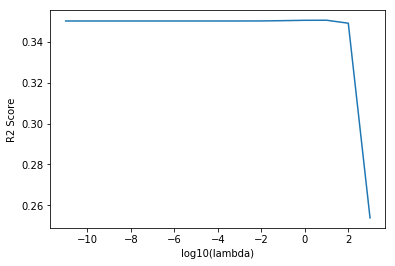

In [82]:
plt.plot(np.log10(list(alphas.keys())),alphas.values())
plt.xlabel("log10(lambda)")
plt.ylabel("R2 Score")
plt.show()

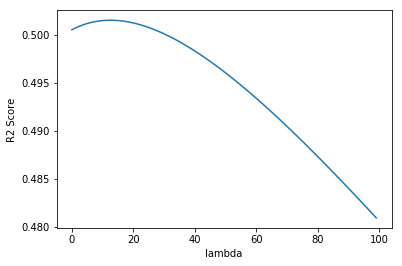

In [83]:
plt.plot(list(alphas2.keys()),alphas2.values())
plt.xlabel("lambda")
plt.ylabel("R2 Score")
plt.show()

In [84]:
rr =  Ridge(alpha=bestAlpha)
rr.fit(X_train, y_train)
R2rr=rr.score(X_test, y_test)
scoresTP["Ridge"]=R2rr
print("R2 score avec Ridge pour le best lambda "+str(R2rr))

R2 score avec Ridge pour le best lambda 0.4241962031724128


## 13) Lasso

On commence par chercher le bon paramètre alpha par cross validation

In [95]:
my_alphas = np.array([10**(3-x) for x in range(8)])
lassoCV = LassoCV(alphas=my_alphas,random_state=2,cv=5, max_iter=10**5)

lassoCV.fit(X_train,y_train)
print(lassoCV.alphas_)

[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04]


On récupère les moyennes des MSE pour chacun des alphas 

In [96]:
avg_mse = np.mean(lassoCV.mse_path_,axis=1)
print(avg_mse)


[6102.08930191 6102.08930191 3310.64079384 3532.94380437 3760.73473379
 3790.10664639 3793.16917404 3793.48699889]


In [97]:
#print(lcv.score(X_test,y_test))

In [100]:
print(lassoCV.coef_)

[-0.          0.          0.          0.         -0.          0.
  0.         -0.          0.          0.          0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.          0.
 -0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.         -0.         22.93642188 -0.
 -0.          0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.         -0.          0.         -0.         -0.          0.
  0.         -0.         

On trace les moyennes des MSE pour chaque alpha

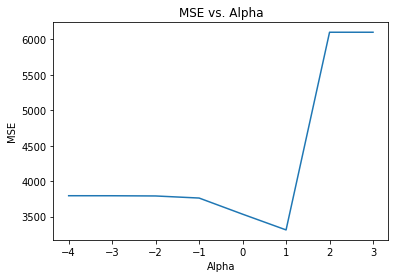

In [124]:

plt.plot(np.log10(lassoCV.alphas_),avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()

On récupère le meilleur alpha

In [112]:
print(lassoCV.alphas_[avg_mse.argmin()])

10.0


Ou plus simplement

In [115]:
print(lassoCV.alpha_)

10.0


In [118]:
scoresTP["lasso"]=lassoCV.score(X_test,y_test)
print(scoresTP["lasso"])

0.4076244680713219


On obtient un R2 de 0.408

In [129]:
indexCoeffLassoSelected= np.nonzero(lcv.coef_)
print(lassoCV.coef_[indexCoeffLassoSelected])
print("Il y a "+str(len(indexCoeffLassoSelected[0]))+" coefficients non nuls")

[22.93642188 21.89582118  4.6688622  -2.99516852]
Il y a 4 coefficients non nuls


On reconstruit notre XLasso avec uniquement les variables sélectionnées par le lasso:

In [138]:
X_train_lasso=pd.DataFrame(X_train)[ indexCoeffLassoSelected[0]]
X_test_lasso=pd.DataFrame(X_test)[ indexCoeffLassoSelected[0]]

In [139]:
X_train_lasso.head()

,58,123,167,174
0,1.501026,1.501604,2.052249,-0.448039
1,0.866554,0.707594,-0.553511,-0.757647
2,-0.447709,1.663425,1.835102,-0.989853
3,-1.376756,-0.069457,-0.119218,0.867796
4,1.795602,1.701832,-0.770658,-1.299461


On applique l'OLS sur ce nouveau Xlasso

In [140]:
X_train_lasso_I= sm.add_constant(X_train_lasso)
X_test_lasso_I= sm.add_constant(X_test_lasso)


thetaLasso=np.linalg.inv(X_train_lasso_I.T@X_train_lasso_I)@X_train_lasso_I.T@y_train
#On projette Xtest sur l'espace PCA 
ypredLasso= X_test_lasso_I@thetaLasso


In [144]:
R2Lasso=1-np.sum((ypredLasso-y_test)**2)/np.sum((y_test-y_test.mean())**2)
scoresTP["lasso"]=R2Lasso
print("R2 pour Lasso "+str(R2Lasso))

R2 pour Lasso 0.4380609764378125


In [145]:
lrLasso= LinearRegression()
lrLasso.fit(X_train_lasso,y_train)
scoreLasso=lrLasso.score(X_test_lasso, y_test)
predLasso=lrLasso.predict(X_test_lasso)
print(scoreLasso)

0.4380609764378126


In [146]:
arra=np.append(predLasso.reshape(len(y_test),1),y_test.reshape(len(y_test),1), axis=1)
dfpredictlasso=pd.DataFrame(arra)
dfpredictlasso.head()

,0,1
0,146.687096,113.0
1,113.499414,102.0
2,273.746982,281.0
3,179.437898,198.0
4,139.245407,253.0


In [162]:
print(scoresTP)

{'PCA+OLS': 0.4228732799051903, 'OLS': 0.42287327990518964, 'Fwd': 0.3348982842131624, 'Ridge': 0.4241962031724128, 'lasso': 0.4380609764378125}


In [165]:
pd.DataFrame.from_dict(scoresTP, orient='index')

,0
PCA+OLS,0.422873
OLS,0.422873
Fwd,0.334898
Ridge,0.424196
lasso,0.438061
